In [1]:
import pandas as pd

In [3]:
labels = pd.read_csv('F:/Pneumonia Detection/stage_2_train_labels.csv')
details = pd.read_csv('F:/Pneumonia Detection/stage_2_detailed_class_info.csv')

In [4]:
labels.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [6]:
labels.shape

(30227, 6)

In [7]:
details.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [8]:
details.shape

(30227, 2)

In [5]:
#dropping duplicate records per patientId
# duplicates in details just have the same class so can be safely dropped
details = details.drop_duplicates('patientId').reset_index(drop=True)
details.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [10]:
details.shape

(26684, 2)

In [6]:
#merging labels table with details table per patientId
labels_w_class = labels.merge(details, how='inner', on='patientId')
labels_w_class.head()

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity


In [12]:
labels_w_class.shape

(30227, 7)

In [13]:
#Parsing Metadata from DICOM object

In [7]:
import glob

In [8]:
#storing all records
train_dcm_fps = glob.glob('F:/Pneumonia Detection/stage_2_train_images/*.dcm')
test_dcm_fps = glob.glob('F:/Pneumonia Detection/stage_2_test_images/*.dcm')

In [9]:
train_dcm_fps[0:5]

['F:/Pneumonia Detection/stage_2_train_images\\0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm',
 'F:/Pneumonia Detection/stage_2_train_images\\000924cf-0f8d-42bd-9158-1af53881a557.dcm',
 'F:/Pneumonia Detection/stage_2_train_images\\000db696-cf54-4385-b10b-6b16fbb3f985.dcm',
 'F:/Pneumonia Detection/stage_2_train_images\\000fe35a-2649-43d4-b027-e67796d412e0.dcm',
 'F:/Pneumonia Detection/stage_2_train_images\\001031d9-f904-4a23-b3e5-2c088acd19c6.dcm']

In [17]:
test_dcm_fps[0:5]

['F:/Pneumonia Detection/stage_2_test_images\\0000a175-0e68-4ca4-b1af-167204a7e0bc.dcm',
 'F:/Pneumonia Detection/stage_2_test_images\\0005d3cc-3c3f-40b9-93c3-46231c3eb813.dcm',
 'F:/Pneumonia Detection/stage_2_test_images\\000686d7-f4fc-448d-97a0-44fa9c5d3aa6.dcm',
 'F:/Pneumonia Detection/stage_2_test_images\\000e3a7d-c0ca-4349-bb26-5af2d8993c3d.dcm',
 'F:/Pneumonia Detection/stage_2_test_images\\00100a24-854d-423d-a092-edcf6179e061.dcm']

In [11]:
import pydicom

In [19]:
#view the first record from metadata
pydicom.read_file(train_dcm_fps[0])

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: PA'
(0010, 0010) Patient's Name                      PN: '0004cfab-14fd-4e49-80ba-63a80b6bddd6'
(0010, 0020) Patient ID                          LO: '0004cfab-14fd-4e49-80ba-63a80b6bddd6'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'F'
(0010, 1010) Patient'

In [12]:
#read each file into a list (using stop_before_pixels to avoid reading the image for speed and memory savings)
train_dcms = [pydicom.read_file(x, stop_before_pixels=True) for x in train_dcm_fps]
test_dcms = [pydicom.read_file(x, stop_before_pixels=True) for x in test_dcm_fps]

In [13]:
#view the first record
train_dcms[0]

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: PA'
(0010, 0010) Patient's Name                      PN: '0004cfab-14fd-4e49-80ba-63a80b6bddd6'
(0010, 0020) Patient ID                          LO: '0004cfab-14fd-4e49-80ba-63a80b6bddd6'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'F'
(0010, 1010) Patient'

In [14]:
#create a function to parse python dictionary
def parse_dcm_metadata(dcm):
    unpacked_data = {}
    group_elem_to_keywords = {}

    #iterating here to force conversion from lazy RawDataElement to DataElement
    for d in dcm:
        pass

    #keys are pydicom.tag.BaseTag, values are pydicom.dataelem.DataElement
    for tag, elem in dcm.items():
        tag_group = tag.group
        tag_elem = tag.elem
        keyword = elem.keyword
        group_elem_to_keywords[(tag_group, tag_elem)] = keyword
        value = elem.value
        unpacked_data[keyword] = value
    return unpacked_data, group_elem_to_keywords    

In [15]:
#create a tuple containing dictionary
train_meta_dicts, tag_to_keyword_train = zip(*[parse_dcm_metadata(x) for x in train_dcms])
test_meta_dicts, tag_to_keyword_test = zip(*[parse_dcm_metadata(x) for x in test_dcms])

In [24]:
#view 1st two records in the tuple
train_meta_dicts[0:2]

({'SpecificCharacterSet': 'ISO_IR 100',
  'SOPClassUID': '1.2.840.10008.5.1.4.1.1.7',
  'SOPInstanceUID': '1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526',
  'StudyDate': '19010101',
  'StudyTime': '000000.00',
  'AccessionNumber': '',
  'Modality': 'CR',
  'ConversionType': 'WSD',
  'ReferringPhysicianName': '',
  'SeriesDescription': 'view: PA',
  'PatientName': '0004cfab-14fd-4e49-80ba-63a80b6bddd6',
  'PatientID': '0004cfab-14fd-4e49-80ba-63a80b6bddd6',
  'PatientBirthDate': '',
  'PatientSex': 'F',
  'PatientAge': '51',
  'BodyPartExamined': 'CHEST',
  'ViewPosition': 'PA',
  'StudyInstanceUID': '1.2.276.0.7230010.3.1.2.8323329.28530.1517874485.775525',
  'SeriesInstanceUID': '1.2.276.0.7230010.3.1.3.8323329.28530.1517874485.775524',
  'StudyID': '',
  'SeriesNumber': "1",
  'InstanceNumber': "1",
  'PatientOrientation': '',
  'SamplesPerPixel': 1,
  'PhotometricInterpretation': 'MONOCHROME2',
  'Rows': 1024,
  'Columns': 1024,
  'PixelSpacing': [0.14300000000000002, 0.14

In [25]:
tag_to_keyword_train[0:2]

({(8, 5): 'SpecificCharacterSet',
  (8, 22): 'SOPClassUID',
  (8, 24): 'SOPInstanceUID',
  (8, 32): 'StudyDate',
  (8, 48): 'StudyTime',
  (8, 80): 'AccessionNumber',
  (8, 96): 'Modality',
  (8, 100): 'ConversionType',
  (8, 144): 'ReferringPhysicianName',
  (8, 4158): 'SeriesDescription',
  (16, 16): 'PatientName',
  (16, 32): 'PatientID',
  (16, 48): 'PatientBirthDate',
  (16, 64): 'PatientSex',
  (16, 4112): 'PatientAge',
  (24, 21): 'BodyPartExamined',
  (24, 20737): 'ViewPosition',
  (32, 13): 'StudyInstanceUID',
  (32, 14): 'SeriesInstanceUID',
  (32, 16): 'StudyID',
  (32, 17): 'SeriesNumber',
  (32, 19): 'InstanceNumber',
  (32, 32): 'PatientOrientation',
  (40, 2): 'SamplesPerPixel',
  (40, 4): 'PhotometricInterpretation',
  (40, 16): 'Rows',
  (40, 17): 'Columns',
  (40, 48): 'PixelSpacing',
  (40, 256): 'BitsAllocated',
  (40, 257): 'BitsStored',
  (40, 258): 'HighBit',
  (40, 259): 'PixelRepresentation',
  (40, 8464): 'LossyImageCompression',
  (40, 8468): 'LossyImageCompr

In [26]:
#join all the dicts to form unified dictionary
unified_tag_to_key_train = {k:v for dict_ in tag_to_keyword_train for k,v in dict_.items()}
unified_tag_to_key_test = {k:v for dict_ in tag_to_keyword_test for k,v in dict_.items()}

In [27]:
unified_tag_to_key_test.keys()

dict_keys([(8, 5), (8, 22), (8, 24), (8, 32), (8, 48), (8, 80), (8, 96), (8, 100), (8, 144), (8, 4158), (16, 16), (16, 32), (16, 48), (16, 64), (16, 4112), (24, 21), (24, 20737), (32, 13), (32, 14), (32, 16), (32, 17), (32, 19), (32, 32), (40, 2), (40, 4), (40, 16), (40, 17), (40, 48), (40, 256), (40, 257), (40, 258), (40, 259), (40, 8464), (40, 8468)])

In [28]:
unified_tag_to_key_test.values()

dict_values(['SpecificCharacterSet', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'StudyTime', 'AccessionNumber', 'Modality', 'ConversionType', 'ReferringPhysicianName', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientAge', 'BodyPartExamined', 'ViewPosition', 'StudyInstanceUID', 'SeriesInstanceUID', 'StudyID', 'SeriesNumber', 'InstanceNumber', 'PatientOrientation', 'SamplesPerPixel', 'PhotometricInterpretation', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'LossyImageCompression', 'LossyImageCompressionMethod'])

In [29]:
#assert statement is a debugging aid that tests a condition. If the condition is true, it does nothing and your program just continues to execute.
#But if the assert condition evaluates to false, it raises an AssertionError exception with an optional error message

In [30]:
#quick check to make sure there are no different keys between test/train
assert len(set(unified_tag_to_key_test.keys()).symmetric_difference(set(unified_tag_to_key_train.keys()))) == 0

tag_to_key = {**unified_tag_to_key_test, **unified_tag_to_key_train}
tag_to_key

{(8, 5): 'SpecificCharacterSet',
 (8, 22): 'SOPClassUID',
 (8, 24): 'SOPInstanceUID',
 (8, 32): 'StudyDate',
 (8, 48): 'StudyTime',
 (8, 80): 'AccessionNumber',
 (8, 96): 'Modality',
 (8, 100): 'ConversionType',
 (8, 144): 'ReferringPhysicianName',
 (8, 4158): 'SeriesDescription',
 (16, 16): 'PatientName',
 (16, 32): 'PatientID',
 (16, 48): 'PatientBirthDate',
 (16, 64): 'PatientSex',
 (16, 4112): 'PatientAge',
 (24, 21): 'BodyPartExamined',
 (24, 20737): 'ViewPosition',
 (32, 13): 'StudyInstanceUID',
 (32, 14): 'SeriesInstanceUID',
 (32, 16): 'StudyID',
 (32, 17): 'SeriesNumber',
 (32, 19): 'InstanceNumber',
 (32, 32): 'PatientOrientation',
 (40, 2): 'SamplesPerPixel',
 (40, 4): 'PhotometricInterpretation',
 (40, 16): 'Rows',
 (40, 17): 'Columns',
 (40, 48): 'PixelSpacing',
 (40, 256): 'BitsAllocated',
 (40, 257): 'BitsStored',
 (40, 258): 'HighBit',
 (40, 259): 'PixelRepresentation',
 (40, 8464): 'LossyImageCompression',
 (40, 8468): 'LossyImageCompressionMethod'}

In [31]:
#convert train & test metadata dicts into train & test dataframes
# using from_records here since some values in the dicts will be iterables and some are constants
train_df = pd.DataFrame.from_records(data=train_meta_dicts)
test_df = pd.DataFrame.from_records(data=test_meta_dicts)

#create a new variable with two classes train & test
train_df['dataset'] = 'train'
test_df['dataset'] = 'test'

#concatenate train & test dataframes into single dataframe
df = pd.concat([train_df, test_df])

In [32]:
print(train_df.shape)
print(test_df.shape)
print(df.shape)

(26684, 35)
(3000, 35)
(29684, 35)


In [33]:
df.head(1)

,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ConversionType,HighBit,InstanceNumber,LossyImageCompression,LossyImageCompressionMethod,...,SeriesDescription,SeriesInstanceUID,SeriesNumber,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime,ViewPosition,dataset
0,,8,8,CHEST,1024,WSD,7,1,01,ISO_10918_1,...,view: PA,1.2.276.0.7230010.3.1.3.8323329.28530.15178744...,1,ISO_IR 100,19010101,,1.2.276.0.7230010.3.1.2.8323329.28530.15178744...,000000.00,PA,train


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29684 entries, 0 to 2999
Data columns (total 35 columns):
AccessionNumber                29684 non-null object
BitsAllocated                  29684 non-null int64
BitsStored                     29684 non-null int64
BodyPartExamined               29684 non-null object
Columns                        29684 non-null int64
ConversionType                 29684 non-null object
HighBit                        29684 non-null int64
InstanceNumber                 29684 non-null int64
LossyImageCompression          29684 non-null object
LossyImageCompressionMethod    29684 non-null object
Modality                       29684 non-null object
PatientAge                     29684 non-null object
PatientBirthDate               29684 non-null object
PatientID                      29684 non-null object
PatientName                    29684 non-null object
PatientOrientation             29684 non-null object
PatientSex                     29684 non-null obj

In [35]:
df[['PatientAge', 'PatientSex', 'PixelSpacing']].head()

,PatientAge,PatientSex,PixelSpacing
0,51,F,"[0.14300000000000002, 0.14300000000000002]"
1,19,F,"[0.139, 0.139]"
2,25,F,"[0.168, 0.168]"
3,40,M,"[0.171, 0.171]"
4,57,M,"[0.139, 0.139]"


In [36]:
#creating two variables by separating PixelSpacing list to single values
df['PixelSpacing_x'] = df['PixelSpacing'].apply(lambda x: x[0])
df['PixelSpacing_y'] = df['PixelSpacing'].apply(lambda x: x[1])

In [37]:
df[['ReferringPhysicianName', 'PixelSpacing', 'PixelSpacing_x', 'PixelSpacing_y']].head()

,ReferringPhysicianName,PixelSpacing,PixelSpacing_x,PixelSpacing_y
0,,"[0.14300000000000002, 0.14300000000000002]",0.143,0.143
1,,"[0.139, 0.139]",0.139,0.139
2,,"[0.168, 0.168]",0.168,0.168
3,,"[0.171, 0.171]",0.171,0.171
4,,"[0.139, 0.139]",0.139,0.139


In [38]:
df.shape

(29684, 37)

In [39]:
#dropping PixelSpacing column
df = df.drop(['PixelSpacing'], axis='columns')

In [40]:
df.shape

(29684, 36)

In [41]:
# x and y are always the same
assert sum(df['PixelSpacing_x'] != df['PixelSpacing_y']) == 0

In [42]:
# ReferringPhysicianName appears to just be empty strings
assert sum(df['ReferringPhysicianName'] != '') == 0

In [43]:
# SeriesDescription appears to be 'view: {}'.format(ViewPosition)
set(df['SeriesDescription'].unique())

{'view: AP', 'view: PA'}

In [45]:
#view unique values for all variables in df
nunique_all = df.aggregate('nunique')
nunique_all

AccessionNumber                    1
BitsAllocated                      1
BitsStored                         1
BodyPartExamined                   1
Columns                            1
ConversionType                     1
HighBit                            1
InstanceNumber                     1
LossyImageCompression              1
LossyImageCompressionMethod        1
Modality                           1
PatientAge                        98
PatientBirthDate                   1
PatientID                      29684
PatientName                    29684
PatientOrientation                 1
PatientSex                         2
PhotometricInterpretation          1
PixelRepresentation                1
ReferringPhysicianName             1
Rows                               1
SOPClassUID                        1
SOPInstanceUID                 29684
SamplesPerPixel                    1
SeriesDescription                  2
SeriesInstanceUID              29684
SeriesNumber                       1
S

In [44]:
#Looks like PatientAge, PatientSex, PixelSpacing, and ViewPosition are the only metadata items with possible value
#Wide range of ages
#Small number of different Pixel Spacings (maybe relevant in terms of resolution and specific to certain imaging machines or setups?)
#2 different view positions

In [46]:
# drop constant cols and other two from above
df = df.drop(nunique_all[nunique_all == 1].index.tolist() + ['ReferringPhysicianName', 'SeriesDescription'], axis='columns')

In [47]:
df.shape

(29684, 11)

In [48]:
#merging df dataframe with labels_w_class
# now that we have a clean metadata dataframe we can merge back to our initial tabular data with target and class info
df = df.merge(labels_w_class, how='left', left_on='PatientID', right_on='patientId')

In [49]:
#converting char data into integer
df['PatientAge'] = df['PatientAge'].astype(int)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33227 entries, 0 to 33226
Data columns (total 18 columns):
PatientAge           33227 non-null int32
PatientID            33227 non-null object
PatientName          33227 non-null object
PatientSex           33227 non-null object
SOPInstanceUID       33227 non-null object
SeriesInstanceUID    33227 non-null object
StudyInstanceUID     33227 non-null object
ViewPosition         33227 non-null object
dataset              33227 non-null object
PixelSpacing_x       33227 non-null float64
PixelSpacing_y       33227 non-null float64
patientId            30227 non-null object
x                    9555 non-null float64
y                    9555 non-null float64
width                9555 non-null float64
height               9555 non-null float64
Target               30227 non-null float64
class                30227 non-null object
dtypes: float64(7), int32(1), object(10)
memory usage: 4.7+ MB


In [51]:
df.head(2)

,PatientAge,PatientID,PatientName,PatientSex,SOPInstanceUID,SeriesInstanceUID,StudyInstanceUID,ViewPosition,dataset,PixelSpacing_x,PixelSpacing_y,patientId,x,y,width,height,Target,class
0,51,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0004cfab-14fd-4e49-80ba-63a80b6bddd6,F,1.2.276.0.7230010.3.1.4.8323329.28530.15178744...,1.2.276.0.7230010.3.1.3.8323329.28530.15178744...,1.2.276.0.7230010.3.1.2.8323329.28530.15178744...,PA,train,0.143,0.143,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0.0,No Lung Opacity / Not Normal
1,19,000924cf-0f8d-42bd-9158-1af53881a557,000924cf-0f8d-42bd-9158-1af53881a557,F,1.2.276.0.7230010.3.1.4.8323329.20023.15178744...,1.2.276.0.7230010.3.1.3.8323329.20023.15178744...,1.2.276.0.7230010.3.1.2.8323329.20023.15178744...,AP,train,0.139,0.139,000924cf-0f8d-42bd-9158-1af53881a557,NaN,NaN,NaN,NaN,0.0,Normal


In [52]:
df.shape

(33227, 18)

In [53]:
# df now has multiple rows for some patients (those with multiple bounding boxes in label_w_class)
# so creating one with no duplicates for patients
df_deduped = df.drop_duplicates('PatientID', keep='first')

In [54]:
df_deduped.shape

(29684, 18)

In [ ]:
#Exploratory Data Analysis

In [56]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

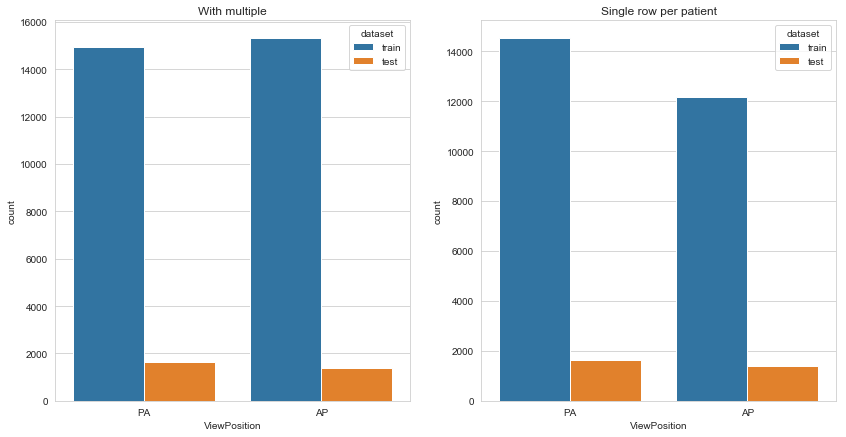

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
p = sns.countplot(x='ViewPosition', hue='dataset', data=df, ax=axes[0])
_ = p.set_title('With multiple')
p = sns.countplot(x='ViewPosition', hue='dataset', data=df_deduped, ax=axes[1])
_ = p.set_title('Single row per patient')

In [ ]:
#Test/Train seems relatively well balanced AP vs PA

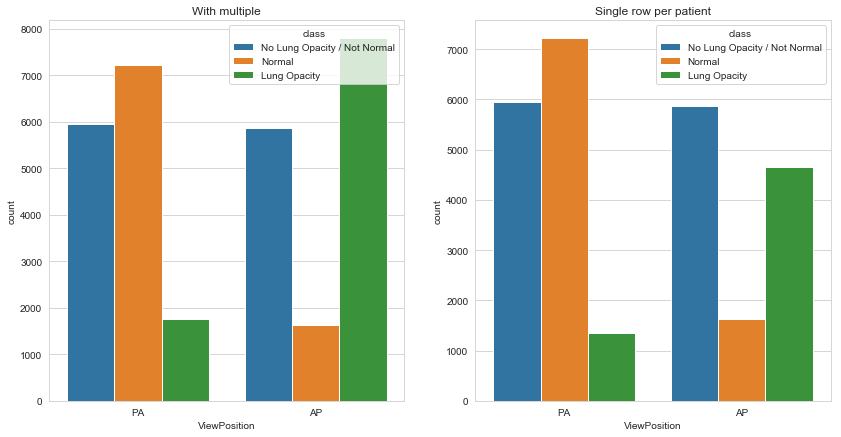

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
p = sns.countplot(x='ViewPosition', hue='class', data=df[df['dataset']=='train'], ax=axes[0])
_ = p.set_title('With multiple')
p = sns.countplot(x='ViewPosition', hue='class', data=df_deduped[df_deduped['dataset']=='train'], ax=axes[1])
_ = p.set_title('Single row per patient')

In [ ]:
#AP vs PA have a big shift in the 'Normal' and 'Lung Opacity' classes

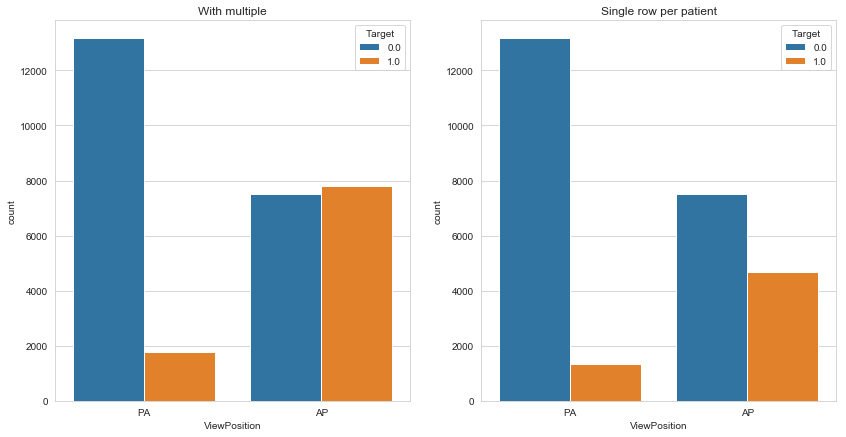

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
p = sns.countplot(x='ViewPosition', hue='Target', data=df[df['dataset']=='train'], ax=axes[0])
_ = p.set_title('With multiple')
p = sns.countplot(x='ViewPosition', hue='Target', data=df_deduped[df_deduped['dataset']=='train'], ax=axes[1])
_ = p.set_title('Single row per patient')

In [ ]:
#Target 1/0 is well split for AP, but for PA there are many more 0s

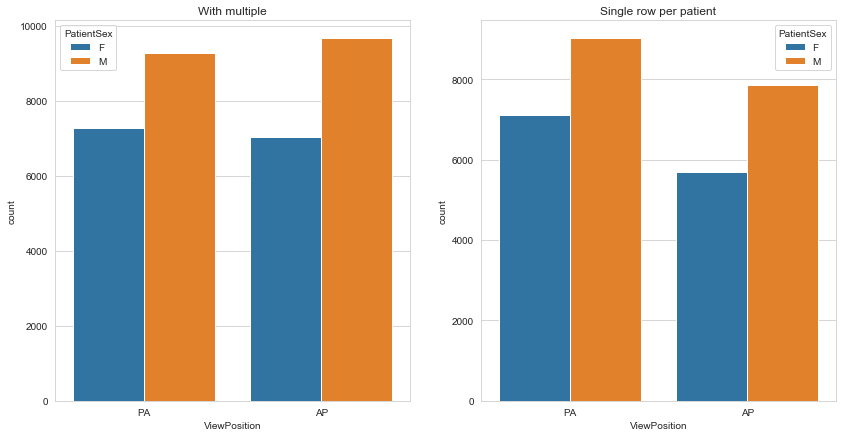

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
p = sns.countplot(x='ViewPosition', hue='PatientSex', data=df, ax=axes[0])
_ = p.set_title('With multiple')
p = sns.countplot(x='ViewPosition', hue='PatientSex', data=df_deduped, ax=axes[1])
_ = p.set_title('Single row per patient')

In [ ]:
#Gender seems relatively well balanced AP vs PA

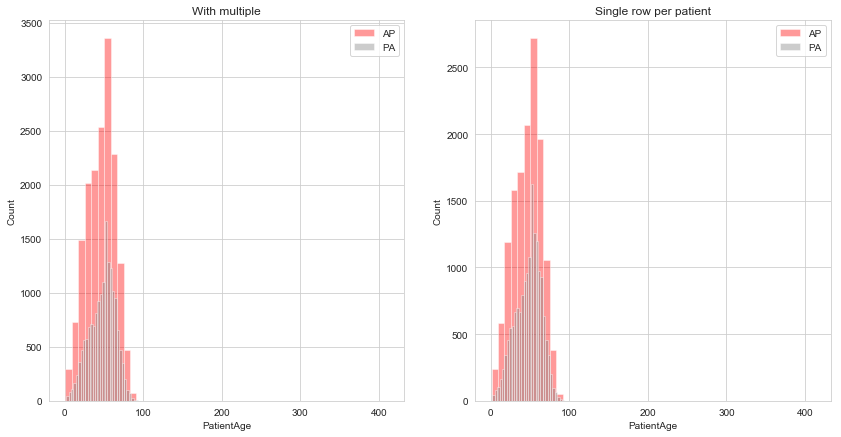

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

p = sns.distplot(df[df['ViewPosition']=='AP']['PatientAge'], hist=True, kde=False, color='red', label='AP', ax=axes[0])
p = sns.distplot(df[df['ViewPosition']=='PA']['PatientAge'], hist=True, kde=False, color='gray', label='PA', ax=axes[0])
_ = p.set_ylabel('Count')
_ = p.legend()
_ = p.set_title('With multiple')

p = sns.distplot(df_deduped[df_deduped['ViewPosition']=='AP']['PatientAge'], hist=True, kde=False, color='red', label='AP', ax=axes[1])
p = sns.distplot(df_deduped[df_deduped['ViewPosition']=='PA']['PatientAge'], hist=True, kde=False, color='gray', label='PA', ax=axes[1])
_ = p.set_ylabel('Count')
_ = p.legend()
_ = p.set_title('Single row per patient')

In [ ]:
#Age distributions seem similar AP vs PA

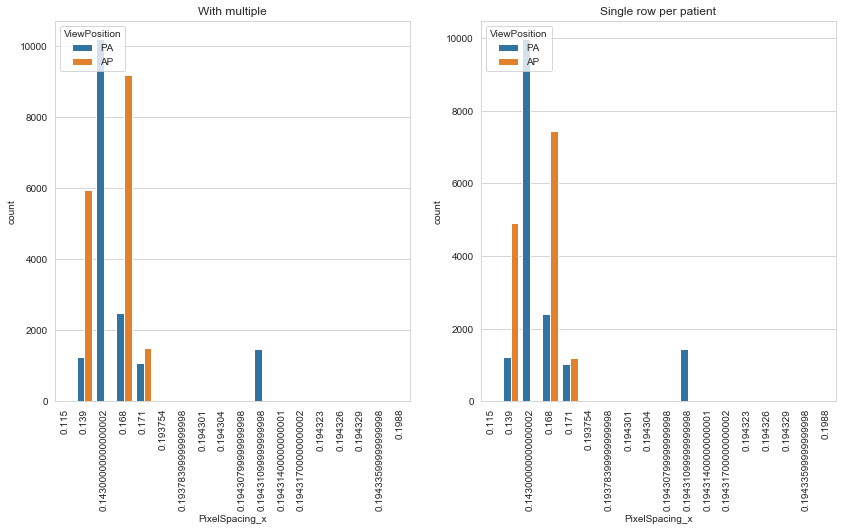

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

p = sns.countplot(df['PixelSpacing_x'], hue='ViewPosition', data=df, ax=axes[0])
_ = p.set_xticklabels([x for x in p.get_xticklabels()],rotation=90)
_ = p.set_title('With multiple')

p = sns.countplot(df_deduped['PixelSpacing_x'], hue='ViewPosition', data=df_deduped, ax=axes[1])
_ = p.set_xticklabels([x for x in p.get_xticklabels()],rotation=90)
_ = p.set_title('Single row per patient')

In [ ]:
#Different pixel spacing AP vs PA (probably due to different location of patient relative to imaging machine)

In [63]:
import os

In [64]:
#function to read images
def read_img(patient_id):
    train_fp = 'F:/Pneumonia Detection/stage_2_train_images/{}.dcm'.format(patient_id)
    if os.path.exists(train_fp):
        dcm = pydicom.read_file(train_fp)
    else:
        test_fp = 'F:/Pneumonia Detection/stage_2_test_images/{}.dcm'.format(patient_id)
        dcm = pydicom.read_file(test_fp)
    return dcm

In [65]:
#function to plot images
def plot_grid(df, pid_sample_list, nrows=3, ncols=3, draw_bbox=True, ax_off=True):
    fig = plt.figure(figsize=(16, 12))
    for i in range(nrows * ncols):
        patient_id = pid_sample_list[i]
        img = read_img(patient_id).pixel_array
        ax = fig.add_subplot(nrows, ncols, i + 1)
        plt.imshow(img, cmap='gray')
        ax.set_title(patient_id)
        if ax_off: 
            ax.set_axis_off()
        if draw_bbox:
            bbox_rows = df[df['PatientID'] == patient_id]
            for _, row in bbox_rows.iterrows():
                x, y = row['x'], row['y']
                width, height = row['width'], row['height']
                bbox = patches.Rectangle((x, y), width, height, linewidth=.5, edgecolor='r', facecolor='none')
                ax.add_patch(bbox)
    plt.tight_layout()
    plt.subplots_adjust(wspace=.01, hspace=.01)
    return fig

In [66]:
#extract 20 patientIDs where viewposition is PA from df
df[df['ViewPosition']=='PA']['PatientID'].sample(20).tolist()

['e6cd0e17-9807-4952-8b40-36888deb3351',
 '937fef8c-ecea-4123-afd8-cfac01f1fc92',
 'd06d624d-06fa-4b64-a29d-91c02c6a300a',
 '2d23e774-78fc-4c4c-beb5-5504f915dc27',
 'f244ee07-26ec-4393-8739-4bf02b3e2660',
 '9a7b563e-1f3b-45e9-963c-c888e85d6011',
 'f5e587fa-9b99-4e6f-a0f6-b510bdad6183',
 'fefe9ff5-ec06-43bb-a70a-8a7b4b16b3bd',
 'b607b534-48a2-445d-8579-29ef85752d16',
 '06e1a29a-6307-4ec2-902e-b379d39d2101',
 '6059ba53-cfad-4b39-981a-09f98ee702d1',
 'f0310a43-5e8d-4661-9cfc-4555b47bc581',
 '872d850a-151b-4675-8ebc-975ebe8d4485',
 '64a40621-079a-44ec-a015-62ab39588a5b',
 '9f52af79-905b-4720-8c9d-668ed47dad8e',
 'f02ce786-bbba-4c93-a9ac-8e78716bf6da',
 'd50b31c0-05b1-404d-a03f-330d2b13a1b5',
 '686b3071-ceee-45c2-ad48-f091f4f5db78',
 '6f7a739a-c48b-4236-a349-22d18192f905',
 '91450066-9ebf-4ae2-bd26-359d5a59357b']

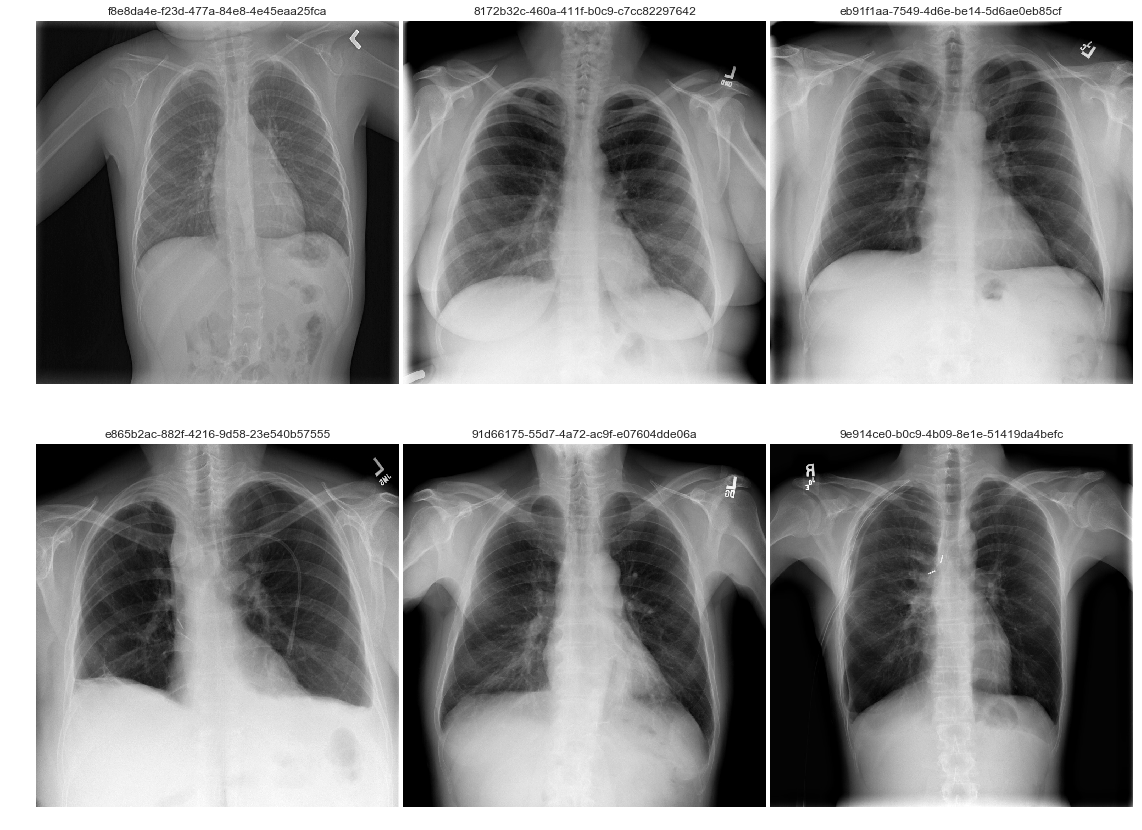

In [67]:
#view images 
pa_ids = df[df['ViewPosition']=='PA']['PatientID'].sample(20).tolist()
_ = plot_grid(df, pa_ids, nrows=2, ncols=3)

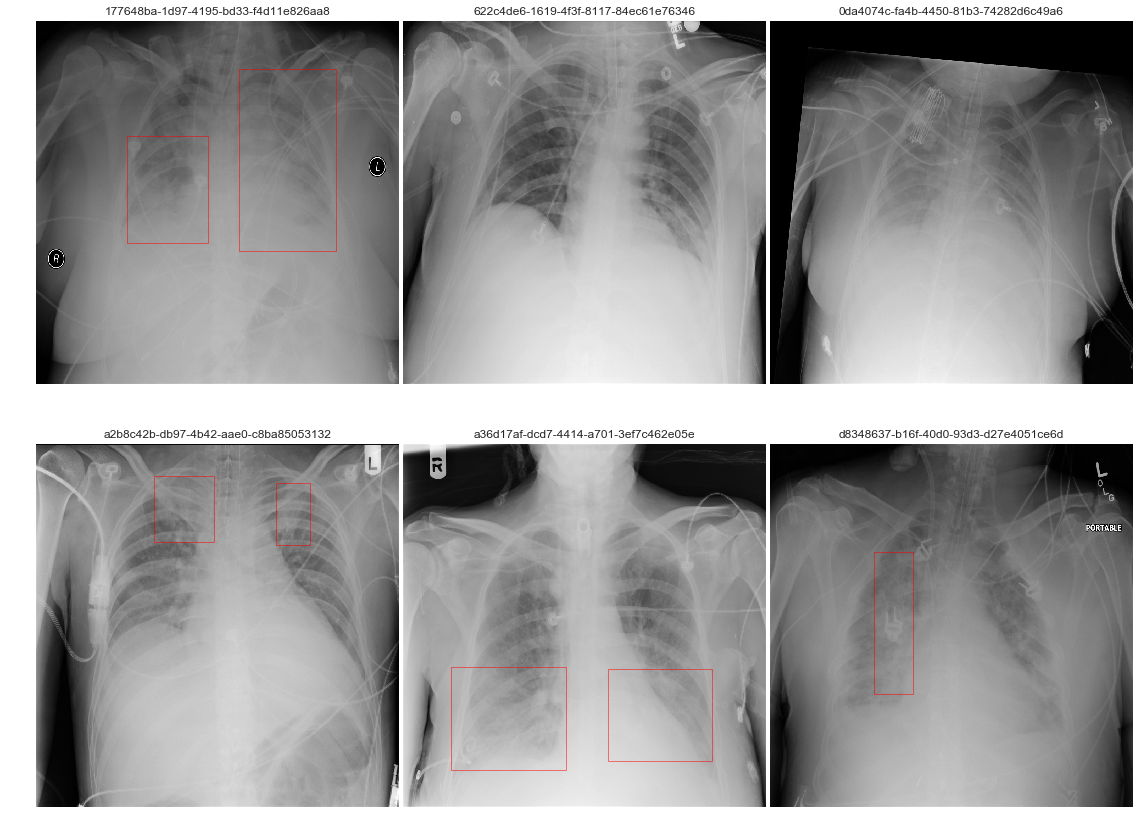

In [68]:
ap_ids = df[df['ViewPosition']=='AP']['PatientID'].sample(20).tolist()
_ = plot_grid(df, ap_ids, nrows=2, ncols=3)

In [69]:
#Viewing the actual images for AP vs PA. The PA images seem much clearer.

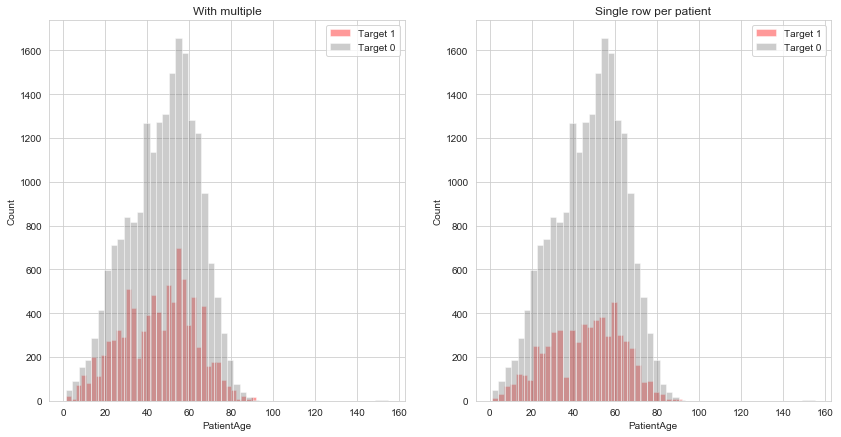

In [70]:
#PatientAge
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

p = sns.distplot(df[df['Target']==1]['PatientAge'], hist=True, kde=False, color='red', label='Target 1', ax=axes[0])
p = sns.distplot(df[df['Target']==0]['PatientAge'], hist=True, kde=False, color='gray', label='Target 0', ax=axes[0])
_ = p.set_ylabel('Count')
_ = p.legend()
_ = p.set_title('With multiple')

p = sns.distplot(df_deduped[df_deduped['Target']==1]['PatientAge'], hist=True, kde=False, color='red', label='Target 1', ax=axes[1])
p = sns.distplot(df_deduped[df_deduped['Target']==0]['PatientAge'], hist=True, kde=False, color='gray', label='Target 0', ax=axes[1])
_ = p.set_ylabel('Count')
_ = p.legend()
_ = p.set_title('Single row per patient')

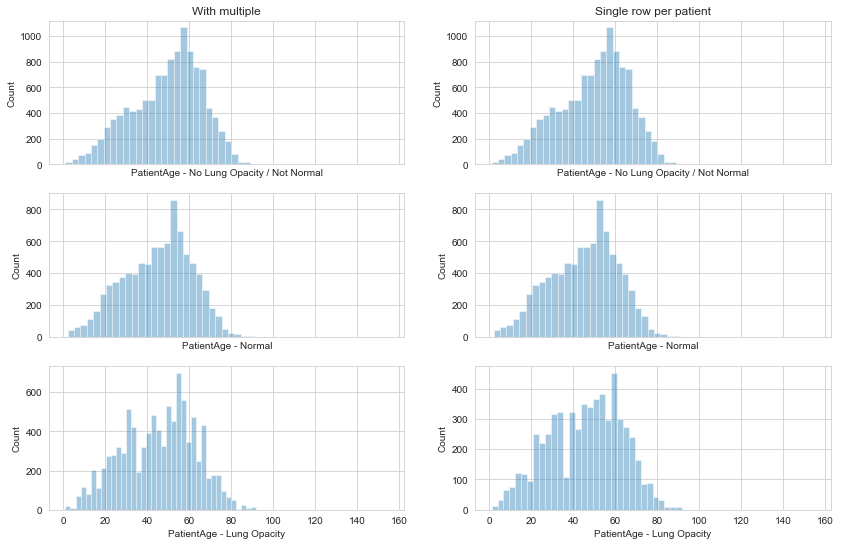

In [71]:
fig, axes = plt.subplots(3, 2, figsize=(14, 9), sharex=True)
for i, _class in enumerate(df['class'].dropna().unique()):
    p = sns.distplot(df[df['class']==_class]['PatientAge'], hist=True, kde=False, ax=axes[i, 0])
    _ = p.set_ylabel('Count')
    _ = p.set_xlabel(f'PatientAge - {_class}')
    if i == 0: p.set_title('With multiple')
    
    p = sns.distplot(df_deduped[df_deduped['class']==_class]['PatientAge'], hist=True, kde=False, ax=axes[i, 1])
    _ = p.set_ylabel('Count')
    _ = p.set_xlabel(f'PatientAge - {_class}')
    if i == 0: p.set_title('Single row per patient')

In [72]:
#distribution of age is fairly consistent when split by target and class

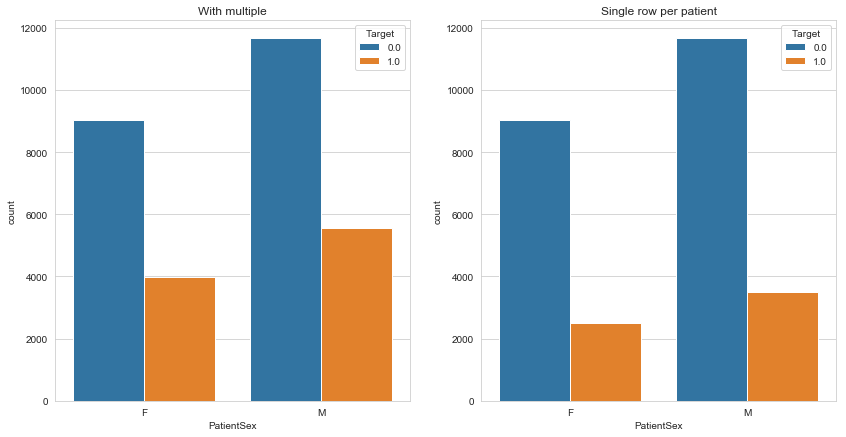

In [73]:
#PatientSex
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
p = sns.countplot(x='PatientSex', hue='Target', data=df, ax=axes[0])
_ = p.set_title('With multiple')
p = sns.countplot(x='PatientSex', hue='Target', data=df_deduped, ax=axes[1])
_ = p.set_title('Single row per patient')

In [ ]:
#Gender male seems to have more than gender female

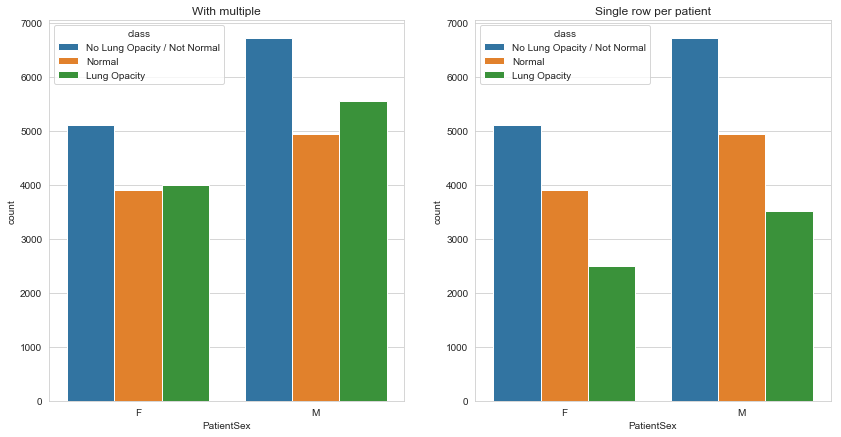

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
p = sns.countplot(x='PatientSex', hue='class', data=df, ax=axes[0])
_ = p.set_title('With multiple')
p = sns.countplot(x='PatientSex', hue='class', data=df_deduped, ax=axes[1])
_ = p.set_title('Single row per patient')

In [ ]:
#PatientSex has a big shift in the 'Normal' and 'Lung Opacity' classes when split by Multiple records pp vs single rpp

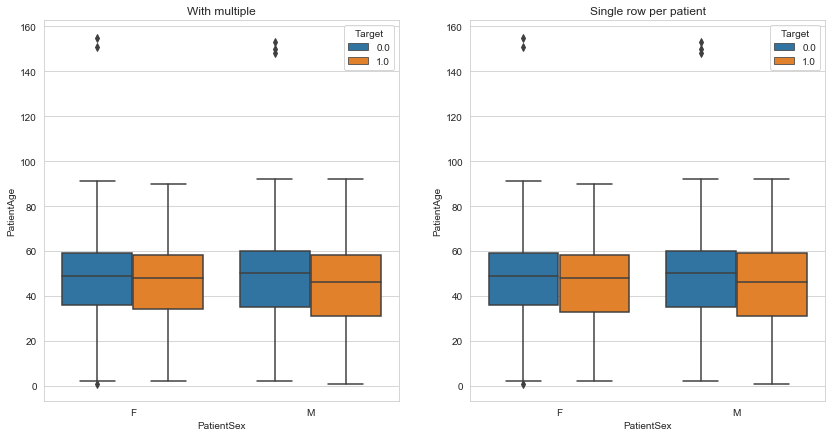

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
p = sns.boxplot(x='PatientSex', y='PatientAge', hue='Target', data=df, ax=axes[0])
_ = p.set_title('With multiple')
p = sns.boxplot(x='PatientSex', y='PatientAge', hue='Target', data=df_deduped, ax=axes[1])
_ = p.set_title('Single row per patient')

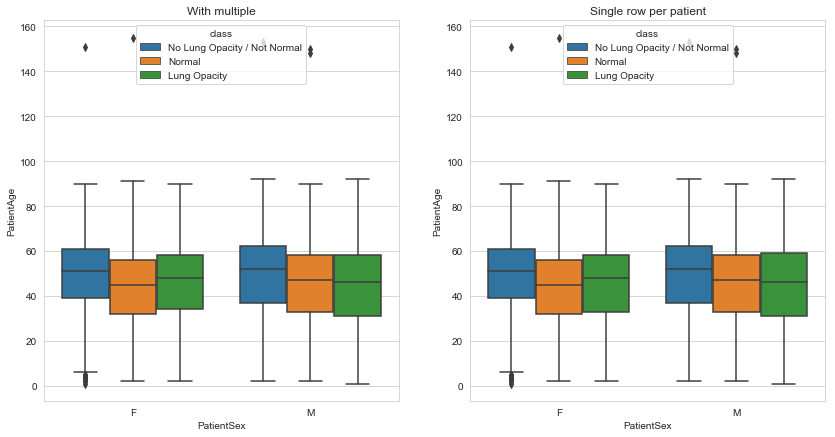

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
p = sns.boxplot(x='PatientSex', y='PatientAge', hue='class', data=df, ax=axes[0])
_ = p.set_title('With multiple')
p = sns.boxplot(x='PatientSex', y='PatientAge', hue='class', data=df_deduped, ax=axes[1])
_ = p.set_title('Single row per patient')

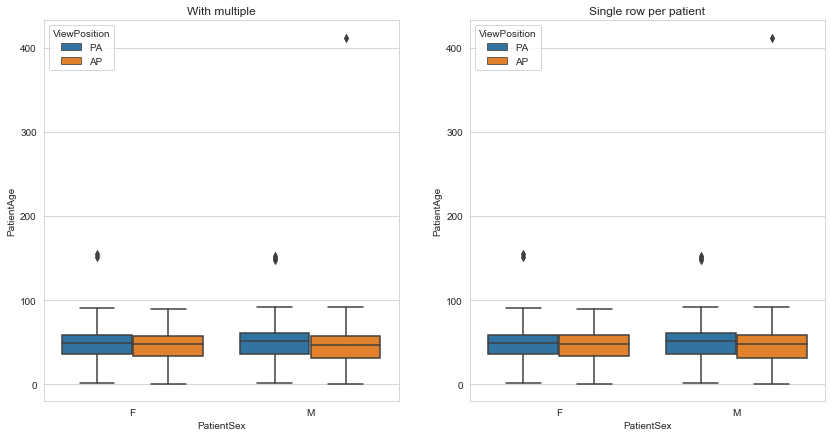

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
p = sns.boxplot(x='PatientSex', y='PatientAge', hue='ViewPosition', data=df, ax=axes[0])
_ = p.set_title('With multiple')
p = sns.boxplot(x='PatientSex', y='PatientAge', hue='ViewPosition', data=df_deduped, ax=axes[1])
_ = p.set_title('Single row per patient')

In [ ]:
#outliers with ages greater than 140 (likely human entry error).
#Otherwise it seems like the distribution of age is fairly consistent when split by target, class & PA vs AP

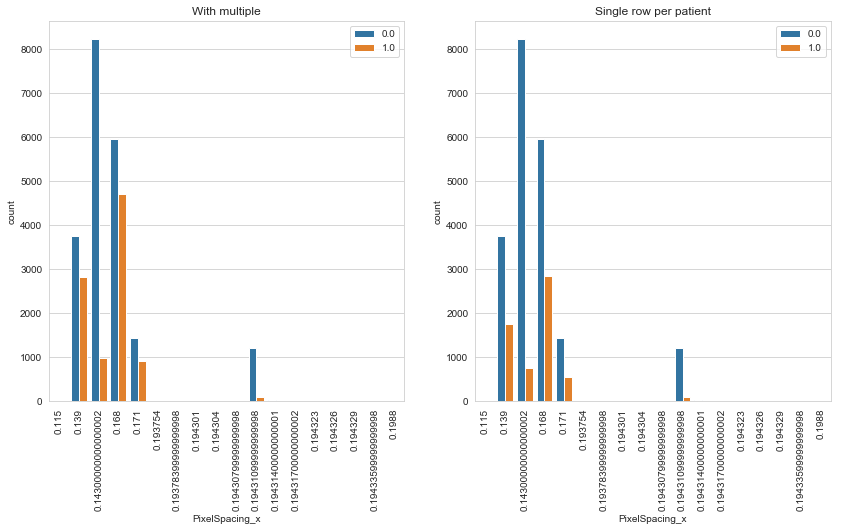

In [78]:
#PixelSpacing
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

p = sns.countplot(df['PixelSpacing_x'], hue='Target', data=df, ax=axes[0])
_ = p.set_xticklabels([x for x in p.get_xticklabels()],rotation=90)
_ = p.set_title('With multiple')
_ = p.legend(loc='upper right')

p = sns.countplot(df_deduped['PixelSpacing_x'], hue='Target', data=df_deduped, ax=axes[1])
_ = p.set_xticklabels([x for x in p.get_xticklabels()],rotation=90)
_ = p.set_title('Single row per patient')
_ = p.legend(loc='upper right')

In [ ]:
#Different pixel spacing for Target 0 vs 1

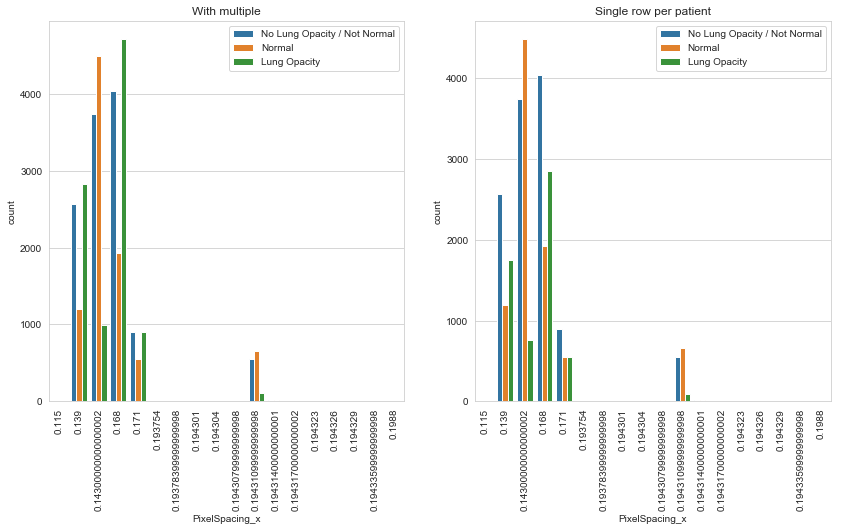

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

p = sns.countplot(df['PixelSpacing_x'], hue='class', data=df, ax=axes[0])
_ = p.set_xticklabels([x for x in p.get_xticklabels()],rotation=90)
_ = p.set_title('With multiple')
_ = p.legend(loc='upper right')

p = sns.countplot(df_deduped['PixelSpacing_x'], hue='class', data=df_deduped, ax=axes[1])
_ = p.set_xticklabels([x for x in p.get_xticklabels()],rotation=90)
_ = p.set_title('Single row per patient')
_ = p.legend(loc='upper right')

In [ ]:
#Different pixel spacing for 3 classes 

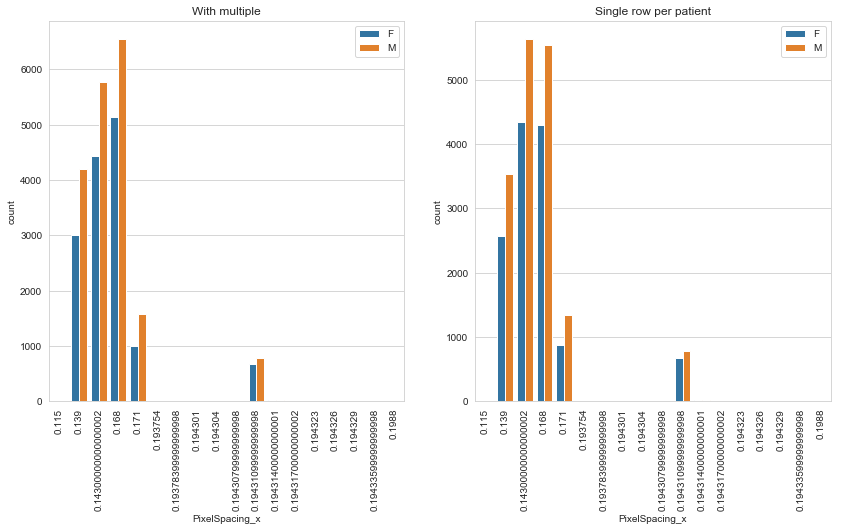

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

p = sns.countplot(df['PixelSpacing_x'], hue='PatientSex', data=df, ax=axes[0])
_ = p.set_xticklabels([x for x in p.get_xticklabels()],rotation=90)
_ = p.set_title('With multiple')
_ = p.legend(loc='upper right')

p = sns.countplot(df_deduped['PixelSpacing_x'], hue='PatientSex', data=df_deduped, ax=axes[1])
_ = p.set_xticklabels([x for x in p.get_xticklabels()],rotation=90)
_ = p.set_title('Single row per patient')
_ = p.legend(loc='upper right')

In [ ]:
#Different pixel spacing for gender-wise as well

In [81]:
#Initial Tabular data

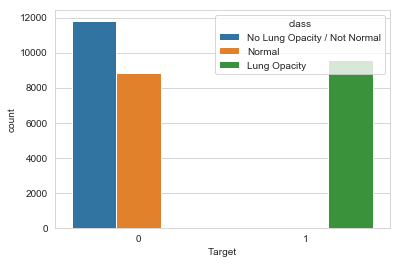

In [82]:
p = sns.countplot(x='Target', hue='class', data=labels_w_class)

In [ ]:
#normal and no lung opacity/not normal are under '0' target and lung opacity under '1' target

In [83]:
# check every row with Target==1 has a bounding box
assert sum(labels_w_class['Target']==1) == sum(~labels_w_class['x'].isnull())

bbox_counts = labels_w_class.groupby('patientId')['Target'].sum()
labels_w_class.index = labels_w_class.patientId
labels_w_class['bbox_counts'] = bbox_counts
labels_w_class = labels_w_class.reset_index(drop=True)

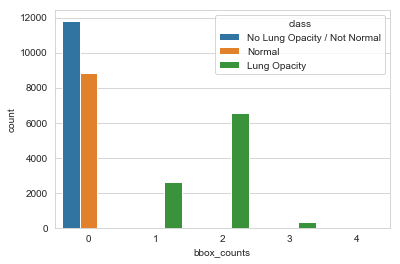

In [84]:
p = sns.countplot(x='bbox_counts', hue='class', data=labels_w_class)

In [ ]:
#no lung opacity records under '0' bounding box count
#lung opacity records are under other bounding box counts

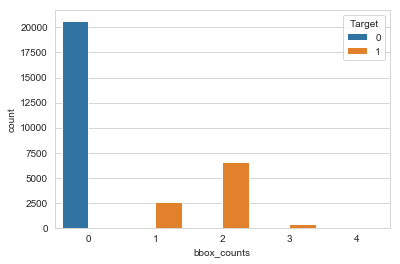

In [85]:
p = sns.countplot(x='bbox_counts', hue='Target', data=labels_w_class)

In [ ]:
#target '0' records are under bbox count 0 

In [86]:
labels_w_class[['x', 'y', 'width', 'height']].mean()

x         394.047724
y         366.839560
width     218.471376
height    329.269702
dtype: float64

In [93]:
#Bounding Box
#Bounding Box Data Manipulation
import numpy as np
from functools import partial
from collections import defaultdict

In [89]:
#bbox_arrays = build_bbox_arrays_by_id(df[df['Target']==1])
df[df['Target']==1].shape

(9555, 18)

In [90]:
#reduced data size to 3000 due to memory error while running on entire data
df_tar_1_3000 = df[df['Target']==1].head(3000)
df_tar_1_3000.shape

(3000, 18)

In [97]:
def build_bbox_arrays_by_id(df):
    zeros_array_constructor = partial(np.zeros, shape=(1024,1024), dtype=np.uint8)
    arrays = defaultdict(zeros_array_constructor)
    for idx, row in df.iterrows():
        patient_id = row['patientId']
        x, y = int(row['x']), int(row['y'])
        width, height = int(row['width']), int(row['height'])
        array = arrays[patient_id]
        array[y: y + height, x: x + width] += 1
    return arrays

In [100]:
bbox_arrays = build_bbox_arrays_by_id(df_tar_1_3000)

In [98]:
#create dictionary to extract relevant records
groups_to_ids = {
    'pa': set(df['patientId'][df['ViewPosition']=='PA'].dropna().unique()),
    'ap': set(df['patientId'][df['ViewPosition']=='AP'].dropna().unique()),
    
    'bbox_4': set(labels_w_class['patientId'][labels_w_class['bbox_counts']==4].dropna().unique()),
    'bbox_3': set(labels_w_class['patientId'][labels_w_class['bbox_counts']==3].dropna().unique()),
    'bbox_2': set(labels_w_class['patientId'][labels_w_class['bbox_counts']==2].dropna().unique()),
    'bbox_1': set(labels_w_class['patientId'][labels_w_class['bbox_counts']==1].dropna().unique()),
    
    'f': set(df['patientId'][df['PatientSex']=='F'].dropna().unique()),
    'm': set(df['patientId'][df['PatientSex']=='M'].dropna().unique()),
    
    'age_above_60': set(df['patientId'][df['PatientAge'] > 60].dropna().unique()),
    'age_40_to_60': set(df['patientId'][(df['PatientAge'] <= 60) & (df['PatientAge'] >= 40)].dropna().unique()),
    'age_below_40': set(df['patientId'][df['PatientAge'] < 40].dropna().unique()),
}

In [101]:
# construct arrays representing 'density' of bounding boxes by summing the arrays
zeros_array_constructor = partial(np.zeros, shape=(1024,1024), dtype=np.uint32)
groups_to_bbox_sums = defaultdict(zeros_array_constructor)
groups_to_bbox_sums['all'] = np.zeros(shape=(1024,1024), dtype=np.uint32)

for patient_id, bbox_array in bbox_arrays.items():
    # add to all group
    groups_to_bbox_sums['all'] += bbox_array

    # add to each other group where id is in that group's id set
    for group, id_set in groups_to_ids.items():
        if patient_id in id_set:
            groups_to_bbox_sums[group] += bbox_array

In [102]:
def plot_density(array, ax, title, n_countour_levels=3):
    contour_set = ax.contour(
        np.arange(0, 1024, 1), 
        np.arange(1024, 0, -1),
        array, 
        n_countour_levels, 
        linewidths=.5,
        colors='black'
    )
    plt.clabel(contour_set, inline=True, fontsize=10, fmt='%.0f')

    im = ax.imshow(
        array, 
        extent=[0, 1024, 0, 1024], 
        origin='upper', 
        cmap='viridis', 
        alpha=.8
    )
    plt.colorbar(im, ax=ax)
    ax.set_title(title)
    return im

In [ ]:
#Bounding Box plots

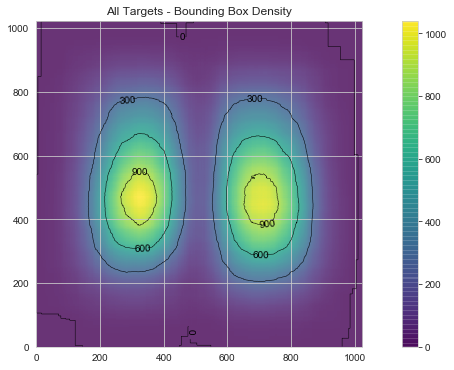

In [103]:
fig, axes = plt.subplots(1, 1, figsize=(14, 6), sharex=True)
_ = plot_density(groups_to_bbox_sums['all'], axes, 'All Targets - Bounding Box Density')

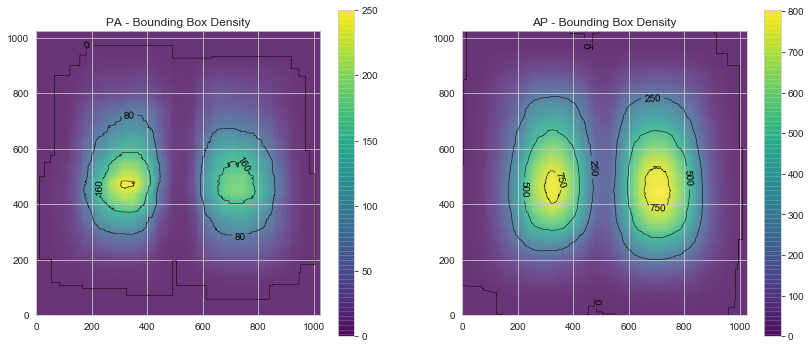

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

_ = plot_density(groups_to_bbox_sums['pa'], axes[0], 'PA - Bounding Box Density')
_ = plot_density(groups_to_bbox_sums['ap'], axes[1], 'AP - Bounding Box Density')

In [ ]:
#Right lung tendency seems more true in PA than in AP

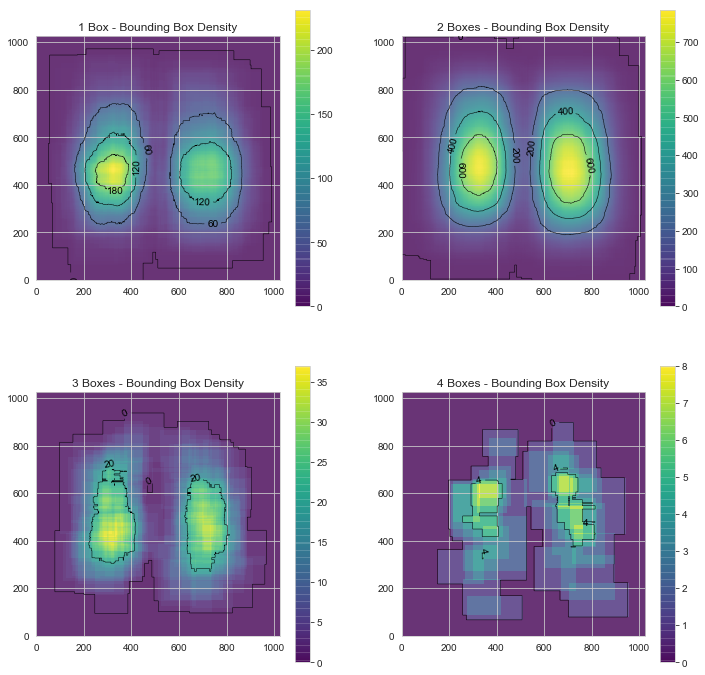

In [105]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

_ = plot_density(groups_to_bbox_sums['bbox_1'], axes[0, 0], '1 Box - Bounding Box Density', n_countour_levels=3)
_ = plot_density(groups_to_bbox_sums['bbox_2'], axes[0, 1], '2 Boxes - Bounding Box Density', n_countour_levels=3)
_ = plot_density(groups_to_bbox_sums['bbox_3'], axes[1, 0], '3 Boxes - Bounding Box Density', n_countour_levels=1)
_ = plot_density(groups_to_bbox_sums['bbox_4'], axes[1, 1], '4 Boxes - Bounding Box Density', n_countour_levels=1)

In [ ]:
#Right lung tendency seems more true in patients with 1 bbox vs 2/3/4

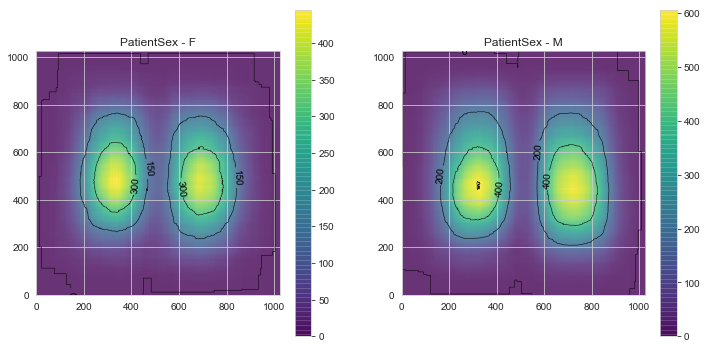

In [106]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

_ = plot_density(groups_to_bbox_sums['f'], axes[0], 'PatientSex - F', n_countour_levels=3)
_ = plot_density(groups_to_bbox_sums['m'], axes[1], 'PatientSex - M', n_countour_levels=3)

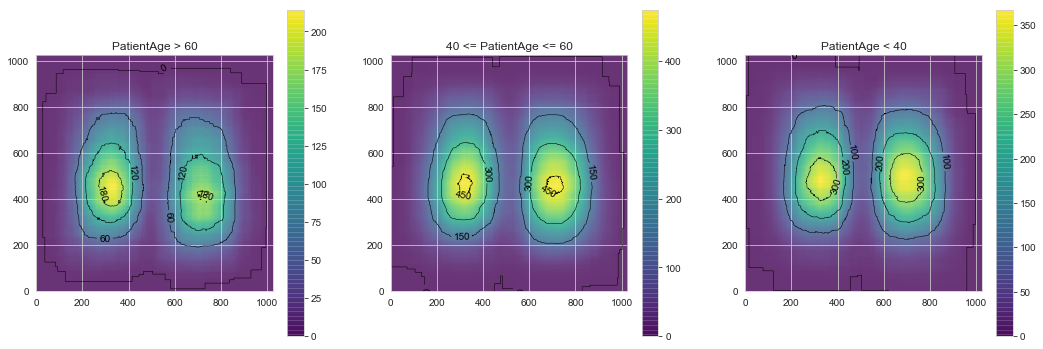

In [107]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

_ = plot_density(groups_to_bbox_sums['age_above_60'], axes[0], 'PatientAge > 60', n_countour_levels=3)
_ = plot_density(groups_to_bbox_sums['age_40_to_60'], axes[1], '40 <= PatientAge <= 60', n_countour_levels=3)
_ = plot_density(groups_to_bbox_sums['age_below_40'], axes[2], 'PatientAge < 40', n_countour_levels=3)

In [ ]:
#Right lung tendency seems more true in Age > 60 than the other age groups
#so in all, Right lung tends to have more in whole group

In [ ]:
#Image Intensity distribution
#to view the distributed of color in the given images

In [114]:
from joblib import Parallel, delayed

In [111]:
def mean_intensity(patientId):
    img = read_img(patientId)
    return np.mean(img.pixel_array)

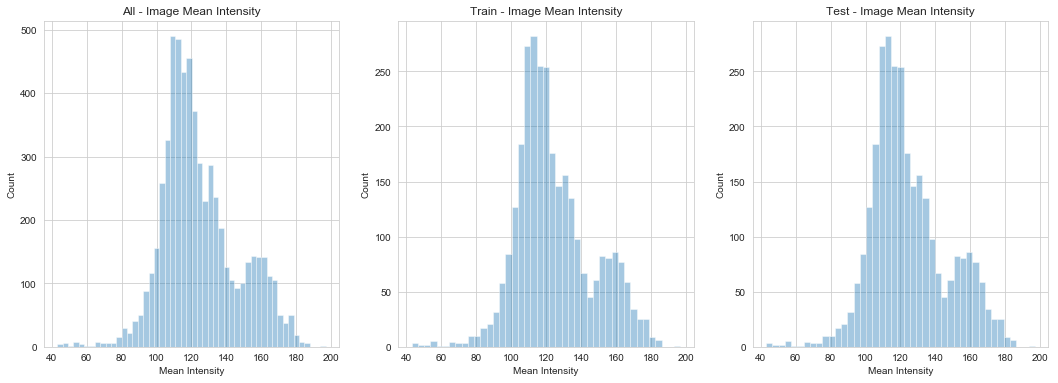

In [112]:
test_patients = df['PatientID'][df['class'].isnull()].tolist()
train_patients = df['PatientID'][df['class'].isnull()].tolist()

test_mean_intensity = Parallel(n_jobs=4)(delayed(mean_intensity)(patientId) for patientId in test_patients)
train_mean_intensity = Parallel(n_jobs=4)(delayed(mean_intensity)(patientId) for patientId in train_patients)
all_mean_intensity = test_mean_intensity + train_mean_intensity

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
p = sns.distplot(all_mean_intensity, ax=axes[0], kde=False)
_ = p.set_title('All - Image Mean Intensity')
_ = p.set_xlabel('Mean Intensity')
_ = p.set_ylabel('Count')

p = sns.distplot(train_mean_intensity, ax=axes[1], kde=False)
_ = p.set_title('Train - Image Mean Intensity')
_ = p.set_xlabel('Mean Intensity')
_ = p.set_ylabel('Count')

p = sns.distplot(test_mean_intensity, ax=axes[2], kde=False)
_ = p.set_title('Test - Image Mean Intensity')
_ = p.set_xlabel('Mean Intensity')
_ = p.set_ylabel('Count')

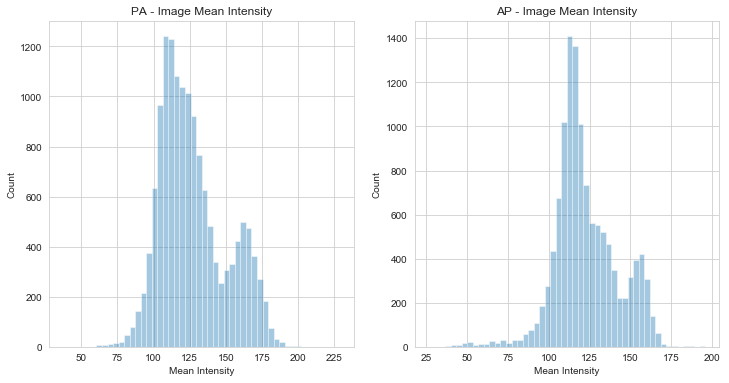

In [119]:
pa_mean_intensity = Parallel(n_jobs=4)(delayed(mean_intensity)(patientId) for patientId in groups_to_ids['pa'])
ap_mean_intensity = Parallel(n_jobs=4)(delayed(mean_intensity)(patientId) for patientId in groups_to_ids['ap'])

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
p = sns.distplot(pa_mean_intensity, ax=axes[0], kde=False)
_ = p.set_title('PA - Image Mean Intensity')
_ = p.set_xlabel('Mean Intensity')
_ = p.set_ylabel('Count')
p = sns.distplot(ap_mean_intensity, ax=axes[1], kde=False)
_ = p.set_title('AP - Image Mean Intensity')
_ = p.set_xlabel('Mean Intensity')
_ = p.set_ylabel('Count')

In [ ]:
#most of the images contain pixel values between 105 and 120
#distribution of pixel intensity is fairly consistent when split by class and PA vs AP

In [ ]:
#Simple LGBM Binary Classifier

In [116]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

In [117]:
df_ = df_deduped[~df_deduped['Target'].isnull()].reset_index(drop=True)
df_['patient_sex'] = df_['PatientSex'].replace({'F': 0, 'M': 1}).astype(np.int8)
df_['view_position'] = df_['ViewPosition'].replace({'AP': 0, 'PA': 1}).astype(np.int8)

In [118]:
cv = KFold(n_splits=10, random_state=2018, shuffle=True)
oof = np.zeros(len(df_))
feats = ['patient_sex', 'PatientAge', 'view_position', 'PixelSpacing_x']

#create train & test samples per k-fold cv
for n_fold, (train_idx, val_idx) in enumerate(cv.split(df_[feats], df_['Target'])):
    train_x, train_y = df_[feats].loc[train_idx], df_['Target'].loc[train_idx]
    val_x, val_y = df_[feats].loc[val_idx], df_['Target'].loc[val_idx]

#set parameters
    clf = LGBMClassifier(
        nthread=0,
        n_estimators=10000,
        learning_rate=.001,
        num_leaves=16,
        colsample_bytree=.75,
        subsample=.75,
        max_depth=5,
        reg_alpha=3,
        reg_lambda=3,
        min_child_weight=50,
        silent=-1,
        verbose=-1,
    )

#fit model
    clf.fit(
        train_x, 
        train_y, 
        eval_set=[(train_x, train_y), (val_x, val_y)], 
        eval_metric='auc', 
        verbose=500, 
        early_stopping_rounds=200,
    )
    
#predictions & evaluations
    oof[val_idx] = clf.predict_proba(val_x, num_iteration=clf.best_iteration_)[:, 1]
    score = roc_auc_score(val_y, oof[val_idx])
    print(f'\nFold {n_fold + 1} AUC : {score}\n')

score = roc_auc_score(df_['Target'], oof)
print(f'\nAUC on All Folds : {score}\n')

Training until validation scores don't improve for 200 rounds
[500]	training's auc: 0.73446	training's binary_logloss: 0.495221	valid_1's auc: 0.735673	valid_1's binary_logloss: 0.506283
[1000]	training's auc: 0.735555	training's binary_logloss: 0.479085	valid_1's auc: 0.737073	valid_1's binary_logloss: 0.489981
Early stopping, best iteration is:
[871]	training's auc: 0.735714	training's binary_logloss: 0.482098	valid_1's auc: 0.738162	valid_1's binary_logloss: 0.493004

Fold 1 AUC : 0.7381621841890791

Training until validation scores don't improve for 200 rounds
[500]	training's auc: 0.736725	training's binary_logloss: 0.496973	valid_1's auc: 0.713965	valid_1's binary_logloss: 0.488797
[1000]	training's auc: 0.738875	training's binary_logloss: 0.480408	valid_1's auc: 0.715874	valid_1's binary_logloss: 0.475702
Early stopping, best iteration is:
[909]	training's auc: 0.738875	training's binary_logloss: 0.482534	valid_1's auc: 0.717393	valid_1's binary_logloss: 0.477298

Fold 2 AUC : 0